# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q=houston"
response = requests.get(query_url).json()
response

{'coord': {'lon': -95.3633, 'lat': 29.7633},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 65.14,
  'feels_like': 64.98,
  'temp_min': 61.16,
  'temp_max': 68.05,
  'pressure': 1016,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 13.8, 'deg': 250, 'gust': 20.71},
 'clouds': {'all': 0},
 'dt': 1666361023,
 'sys': {'type': 2,
  'id': 2001415,
  'country': 'US',
  'sunrise': 1666355218,
  'sunset': 1666395890},
 'timezone': -18000,
 'id': 4699066,
 'name': 'Houston',
 'cod': 200}

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
x = 1
cities_found = []
lat = []
lng = []
max_temp = []
hum = []
cloud = []
wind = []
country = []
date = []
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"{city} data found, record {x} of {len(cities)} processed.")
        cities_found.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        print(f"{city} not found, skipping...")
    x+=1

lucea data found, record 1 of 617 processed.
punta arenas data found, record 2 of 617 processed.
tuktoyaktuk data found, record 3 of 617 processed.
jamestown data found, record 4 of 617 processed.
ushuaia data found, record 5 of 617 processed.
provideniya data found, record 6 of 617 processed.
albany data found, record 7 of 617 processed.
morshansk data found, record 8 of 617 processed.
hilo data found, record 9 of 617 processed.
san policarpo data found, record 10 of 617 processed.
bredasdorp data found, record 11 of 617 processed.
bluff data found, record 12 of 617 processed.
busselton data found, record 13 of 617 processed.
alirajpur data found, record 14 of 617 processed.
taki data found, record 15 of 617 processed.
piacabucu data found, record 16 of 617 processed.
kudahuvadhoo data found, record 17 of 617 processed.
severnoye data found, record 18 of 617 processed.
hobart data found, record 19 of 617 processed.
tasiilaq data found, record 20 of 617 processed.
port blair data found

airai data found, record 157 of 617 processed.
chuy data found, record 158 of 617 processed.
pran buri data found, record 159 of 617 processed.
meyungs data found, record 160 of 617 processed.
meyungs not found, skipping...
kapaa data found, record 161 of 617 processed.
micoud data found, record 162 of 617 processed.
khatanga data found, record 163 of 617 processed.
vangaindrano data found, record 164 of 617 processed.
san cristobal data found, record 165 of 617 processed.
baykit data found, record 166 of 617 processed.
dikson data found, record 167 of 617 processed.
vung tau data found, record 168 of 617 processed.
upernavik data found, record 169 of 617 processed.
kempten data found, record 170 of 617 processed.
luganville data found, record 171 of 617 processed.
deniliquin data found, record 172 of 617 processed.
novo aripuana data found, record 173 of 617 processed.
saskylakh data found, record 174 of 617 processed.
souillac data found, record 175 of 617 processed.
saint-philippe d

aklavik data found, record 313 of 617 processed.
aitape data found, record 314 of 617 processed.
destin data found, record 315 of 617 processed.
gurupa data found, record 316 of 617 processed.
havoysund data found, record 317 of 617 processed.
tandil data found, record 318 of 617 processed.
baruun-urt data found, record 319 of 617 processed.
jaque data found, record 320 of 617 processed.
flinders data found, record 321 of 617 processed.
sao joao da barra data found, record 322 of 617 processed.
mossendjo data found, record 323 of 617 processed.
belaya gora data found, record 324 of 617 processed.
khani data found, record 325 of 617 processed.
banda aceh data found, record 326 of 617 processed.
port hardy data found, record 327 of 617 processed.
santa isabel do rio negro data found, record 328 of 617 processed.
lorengau data found, record 329 of 617 processed.
mana data found, record 330 of 617 processed.
bonthe data found, record 331 of 617 processed.
horqueta data found, record 332 of

klaksvik data found, record 471 of 617 processed.
kazanka data found, record 472 of 617 processed.
bucerias data found, record 473 of 617 processed.
beian data found, record 474 of 617 processed.
tekirdag data found, record 475 of 617 processed.
khonsa data found, record 476 of 617 processed.
cagayan de tawi-tawi data found, record 477 of 617 processed.
cagayan de tawi-tawi not found, skipping...
sioux lookout data found, record 478 of 617 processed.
port macquarie data found, record 479 of 617 processed.
kamyaran data found, record 480 of 617 processed.
imbituba data found, record 481 of 617 processed.
pasighat data found, record 482 of 617 processed.
kalispell data found, record 483 of 617 processed.
yangambi data found, record 484 of 617 processed.
anito data found, record 485 of 617 processed.
fairbanks data found, record 486 of 617 processed.
ust-nera data found, record 487 of 617 processed.
sawtell data found, record 488 of 617 processed.
marovoay data found, record 489 of 617 pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [123]:
weather_dict = {"City":cities_found,
               "Latitude":lat,
               "Longitude":lng,
                "Max Temperature (F)":max_temp,
               "Humidity":hum,
               "Cloudiness":cloud,
               "Wind Speed":wind,
               "Country":country,
               "Date":date}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()


,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Lucea,18.4510,-78.1736,85.86,69,26,3.56,JM,1970-01-20 06:52:41.130
1,Punta Arenas,-53.1500,-70.9167,50.11,44,0,31.07,CL,1970-01-20 06:52:41.130
2,Tuktoyaktuk,69.4541,-133.0374,21.20,86,75,8.05,CA,1970-01-20 06:52:41.130
3,Jamestown,42.0970,-79.2353,49.51,50,0,9.22,US,1970-01-20 06:52:41.130
4,Ushuaia,-54.8000,-68.3000,44.19,77,60,9.42,AR,1970-01-20 06:52:41.130


In [20]:
weather_df.describe()

,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,21.409044,20.549707,61.228990,70.263066,59.439024,7.873554,1.666361e+09
std,33.122550,92.362501,21.012836,21.919863,41.395158,5.856576,1.012450e+02
min,-54.800000,-179.166700,-5.690000,9.000000,0.000000,0.000000,1.666360e+09
25%,-3.954175,-61.732200,45.537500,60.000000,11.000000,3.537500,1.666361e+09
50%,25.967100,25.770250,66.750000,76.000000,75.000000,6.365000,1.666361e+09
75%,49.684175,104.167050,78.190000,86.000000,100.000000,11.137500,1.666361e+09
max,78.218600,179.316700,101.280000,100.000000,100.000000,43.730000,1.666361e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
#  Get the indices of cities that have humidity over 100%.
hum_100 = weather_df.loc[weather_df["Humidity"]>100]
if len(hum_100) == 0:
    print("There are no cities that exceed 100% humidity")
else:
    hum_100

There are no cities that exceed 100% humidity


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [152]:
# format 'Date' column to something readable
old_date = weather_df.iloc[0,8]
type(date)
date = old_date.strftime('%b %d, %Y')

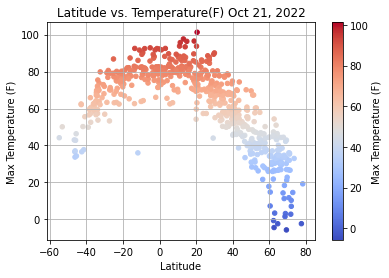

In [153]:

fig, ax = plt.subplots()
weather_df.plot(kind = 'scatter',
                 x='Latitude',
                 y='Max Temperature (F)',
                 c='Max Temperature (F)',
                 colormap = 'coolwarm',
                 grid = True,
                 ax = ax)
plt.title(f"Latitude vs. Temperature(F) {date}")
plt.show()

## Latitude vs. Humidity Plot

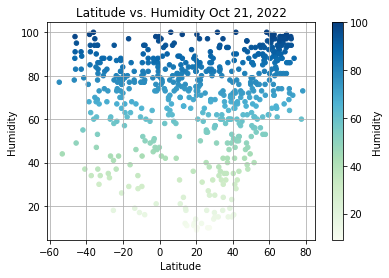

In [154]:
fig, ax = plt.subplots()
weather_df.plot(kind = 'scatter',
                 x='Latitude',
                 y='Humidity',
                 c='Humidity',
                 colormap = 'GnBu',
                 grid = True,
                 ax = ax)
plt.title(f"Latitude vs. Humidity {date}")
plt.show()

## Latitude vs. Cloudiness Plot

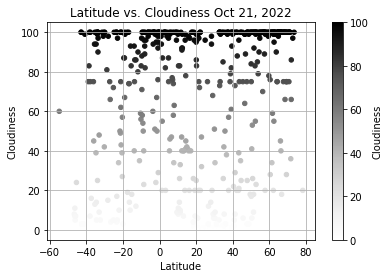

In [155]:
fig, ax = plt.subplots()
weather_df.plot(kind = 'scatter',
                 x='Latitude',
                 y='Cloudiness',
                 c='Cloudiness',
                 colormap = 'Greys',
                 grid = True,
                 ax = ax)
plt.title(f"Latitude vs. Cloudiness {date}")
plt.show()

## Latitude vs. Wind Speed Plot

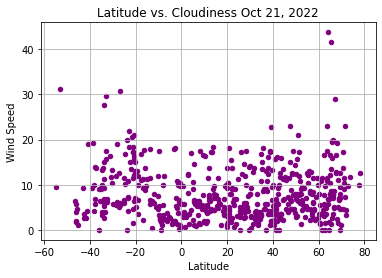

In [156]:
fig, ax = plt.subplots()
weather_df.plot(kind = 'scatter',
                 x='Latitude',
                 y='Wind Speed',
                 c= 'Purple',
                 grid = True,
                 ax = ax)
plt.title(f"Latitude vs. Cloudiness {date}")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

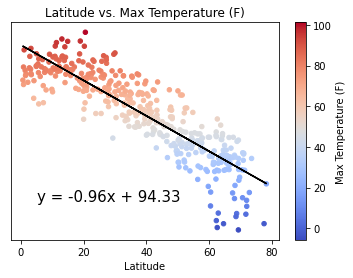

In [157]:
# create dataframe of only cities in the sputhern hemisphere ie latitude < 0
north_df = weather_df.loc[weather_df["Latitude"]>0]

# set up linear regression
x_values = north_df["Latitude"]
y_values = north_df["Max Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create axis and plot both the scatter points and the linear regression line
fig, ax = plt.subplots()
north_df.plot(kind = 'scatter',
                 x=x_values.name,
                 y=y_values.name,
                 c=y_values.name,
                 colormap = 'coolwarm',
                 ax = ax)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
plt.plot(x_values,regress_values,'black')
plt.annotate(line_eq,(5,10),fontsize=15,color="black")

# format and show
plt.title(f"{x_values.name} vs. {y_values.name}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

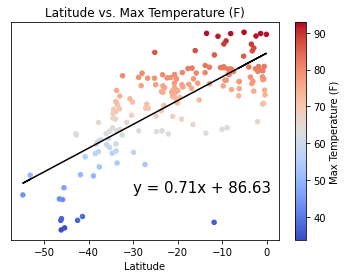

In [158]:
# create dataframe of only cities in the sputhern hemisphere ie latitude < 0
south_df = weather_df.loc[weather_df["Latitude"]<0]

# set up linear regression
x_values = south_df["Latitude"]
y_values = south_df["Max Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create axis and plot both the scatter points and the linear regression line
fig, ax = plt.subplots()
south_df.plot(kind = 'scatter',
                 x=x_values.name,
                 y=y_values.name,
                 c=y_values.name,
                 colormap = 'coolwarm',
                 ax = ax)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(-30,45),fontsize=15,color="black")

# format and show
plt.title(f"{x_values.name} vs. {y_values.name}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

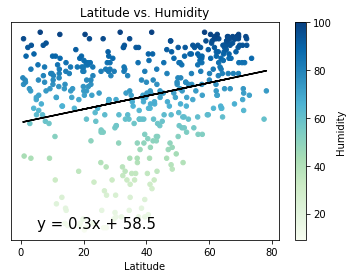

In [159]:
# create dataframe of only cities in the sputhern hemisphere ie latitude < 0
north_df = weather_df.loc[weather_df["Latitude"]>0]

# set up linear regression
x_values = north_df["Latitude"]
y_values = north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create axis and plot both the scatter points and the linear regression line
fig, ax = plt.subplots()
north_df.plot(kind = 'scatter',
                 x=x_values.name,
                 y=y_values.name,
                 c=y_values.name,
                 colormap = 'GnBu',
                 ax = ax)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
plt.plot(x_values,regress_values,'black')
plt.annotate(line_eq,(5,10),fontsize=15,color="black")

# format and show
plt.title(f"{x_values.name} vs. {y_values.name}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

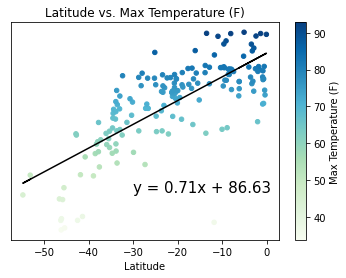

In [160]:
# create dataframe of only cities in the sputhern hemisphere ie latitude < 0
south_df = weather_df.loc[weather_df["Latitude"]<0]

# set up linear regression
x_values = south_df["Latitude"]
y_values = south_df["Max Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create axis and plot both the scatter points and the linear regression line
fig, ax = plt.subplots()
south_df.plot(kind = 'scatter',
                 x=x_values.name,
                 y=y_values.name,
                 c=y_values.name,
                 colormap = 'GnBu',
                 ax = ax)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(-30,45),fontsize=15,color="black")

# format and show
plt.title(f"{x_values.name} vs. {y_values.name}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

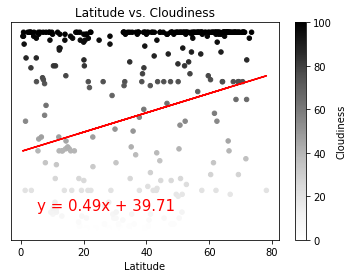

In [161]:
# create dataframe of only cities in the sputhern hemisphere ie latitude < 0
north_df = weather_df.loc[weather_df["Latitude"]>0]

# set up linear regression
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create axis and plot both the scatter points and the linear regression line
fig, ax = plt.subplots()
north_df.plot(kind = 'scatter',
                 x=x_values.name,
                 y=y_values.name,
                 c=y_values.name,
                 colormap = 'Greys',
                 ax = ax)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(5,10),fontsize=15,color="rED")

# format and show
plt.title(f"{x_values.name} vs. {y_values.name}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

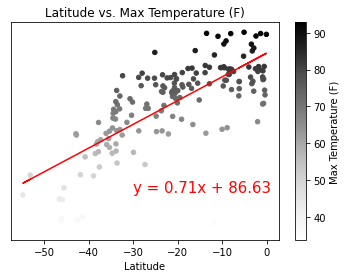

In [162]:
# create dataframe of only cities in the sputhern hemisphere ie latitude < 0
south_df = weather_df.loc[weather_df["Latitude"]<0]

# set up linear regression
x_values = south_df["Latitude"]
y_values = south_df["Max Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create axis and plot both the scatter points and the linear regression line
fig, ax = plt.subplots()
south_df.plot(kind = 'scatter',
                 x=x_values.name,
                 y=y_values.name,
                 c=y_values.name,
                 colormap = 'Greys',
                 ax = ax)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")

# format and show
plt.title(f"{x_values.name} vs. {y_values.name}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

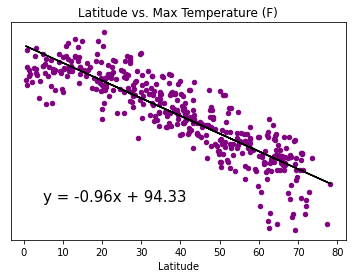

In [163]:
# create dataframe of only cities in the sputhern hemisphere ie latitude < 0
north_df = weather_df.loc[weather_df["Latitude"]>0]

# set up linear regression
x_values = north_df["Latitude"]
y_values = north_df["Max Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create axis and plot both the scatter points and the linear regression line
fig, ax = plt.subplots()
north_df.plot(kind = 'scatter',
                 x=x_values.name,
                 y=y_values.name,
                 c='Purple',
                 ax = ax)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
plt.plot(x_values,regress_values,'black')
plt.annotate(line_eq,(5,10),fontsize=15,color="black")

# format and show
plt.title(f"{x_values.name} vs. {y_values.name}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

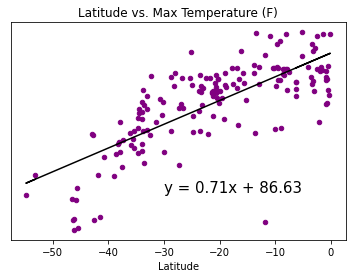

In [164]:
# create dataframe of only cities in the sputhern hemisphere ie latitude < 0
south_df = weather_df.loc[weather_df["Latitude"]<0]

# set up linear regression
x_values = south_df["Latitude"]
y_values = south_df["Max Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create axis and plot both the scatter points and the linear regression line
fig, ax = plt.subplots()
south_df.plot(kind = 'scatter',
                 x=x_values.name,
                 y=y_values.name,
                 c='Purple',
                 ax = ax)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(-30,45),fontsize=15,color="black")

# format and show
plt.title(f"{x_values.name} vs. {y_values.name}")
plt.show()